In [ ]:
# !pip install pyvi

In [82]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras import layers, models, callbacks, preprocessing, utils, optimizers

from src.dtprocess import cleandt
from function.preprocessing import NormalizeText

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# %cd /content/drive/My Drive/Text_Generator

/content/drive/My Drive/Text_Generator


In [ ]:
# %ls

CNN_LSTM_model_architecture.png     model/                           text-classification.ipynb
CNN_LSTM_text-classification.ipynb  model_architecture.png           Text_Classifier.ipynb
data/                               Select_Top3_Generate_Text.ipynb  text_generator.ipynb
generate_text.ipynb                 Simple_RNN_Text_Generator.ipynb
Hibrid_LSTM_CNN.ipynb               temp/


## Import data from source

In [ ]:
vnexpress = pd.read_csv('./data/vnexpress/csv/cleaned_vnexpress.csv').drop(columns=['Unnamed: 0'], axis=1)
vnexpress.shape

(2474, 4)

In [ ]:
vnexpress.head()

,article_id,topic,sub-topic,tag
0,0,doi-song,to-am,xin_lỗi đi nhiều thế_hệ đã dùng câu này để xử_...
1,1,doi-song,to-am,một nghiên_cứu của đại_học wisconsinmadison mỹ...
2,2,doi-song,to-am,các yếu_tố như độ tuổi của trẻ mối quan_hệ giữ...
3,3,doi-song,to-am,ở tuổi đôi_mươi chị trần thị liên_kết_hôn với ...
4,4,doi-song,to-am,chị hoàng thị hòa 34 tuổi ở hà nam lấy chồng b...


In [ ]:
mask = vnexpress['tag'].isna()
vnexpress[mask]

,article_id,topic,sub-topic,tag


In [ ]:
vnexpress['topic'].value_counts()

topic
giai-tri    616
the-thao    508
khoa-hoc    449
doi-song    363
giao-duc    358
du-lich     180
Name: count, dtype: int64

In [ ]:
# %cd /content/drive/My Drive/Text_Generator/data
# %ls

/content/drive/My Drive/Text_Generator/data
test/  train/  vietnamese-stopwords-dash.txt  vnexpress/


In [ ]:
news = vnexpress.copy()
label_encoder = LabelEncoder()
news['topic'] = label_encoder.fit_transform(vnexpress['topic'])
news['tag'] = news['tag'].apply(lambda x: cleandt.remove_stopword(x, '/content/drive/My Drive/Text_Generator/data/vietnamese-stopwords-dash.txt'))

news.head()

,article_id,topic,sub-topic,tag
0,0,0,to-am,xin_lỗi đi thế_hệ câu trẻ anh_chị_em bạn_bè xô...
1,1,0,to-am,nghiên_cứu đại_học wisconsinmadison mỹ xem_xét...
2,2,0,to-am,yếu_tố độ trẻ quan_hệ cha_mẹ hai mức_độ xung_đ...
3,3,0,to-am,đôi_mươi trần thị liên_kết_hôn lâm_sơn hải ấp ...
4,4,0,to-am,hoàng thị hòa 34 hà nam chồng học 3 km bố_mẹ h...


## Initialize the corpus

In [ ]:
normalizer = NormalizeText()

In [ ]:
sequences = normalizer.create_sequences(news)
print('Length of sequences:', len(sequences))
sequences[2]

100%|██████████| 2474/2474 [00:11<00:00, 217.72it/s]

Length of sequences: 2474


'yếu_tố độ trẻ quan_hệ cha_mẹ hai mức_độ xung_đột hợp_tác cha_mẹ ảnh_hưởng trải nghiệm trẻ tiến_sĩ tâm_lý ann gold buscho chuyên_gia lĩnh_vực ly_hôn california mỹ trẻ buộc thuận cha_mẹ sống buộc điều_chỉnh cảm_xúc thích_ứng quy_tắc trẻ_em phản_ứng cha_mẹ ly_hôn ban_đầu bối_rối buồn_bã tức_giận cha_mẹ ly_hôn sắp_xếp cuộc_sống trẻ thích_nghi ý_tưởng sống hai tách_biệt cảm_nhận xung_đột triền_miên cha_mẹ buộc sống hai thế_giới riêng_biệt quy_tắc kỳ_vọng ví_dụ bữa tối 17h bố 20h mẹ hộ gia_đình quy_tắc thói_quen kỳ_vọng trẻ_em thích_nghi phong_cách nuôi dạy lịch_trình môi_trường sống hai nhầm_lẫn căng_thẳng công_việc trẻ mẹ nhất_quán bố trẻ_em thăng_bằng bối_rối sâu_sắc hiếm diễn_đạt cảm_giác thân_thuộc trẻ_em cố_định duy_trì tình hàng_xóm trở_nên ảnh_hưởng cảm_giác an_toàn ổn_định giao_tiếp phối_hợp lịch_trình hoạt_động thông_tin cha_mẹ trẻ xung_đột diễn giao_tiếp kém cha_mẹ ví_dụ cha_mẹ xung_đột lịch_trình đón trẻ trường trẻ bỏ_rơi xung_đột trung_thành trẻ bố_mẹ ngược_lại mẹ bố trẻ lo_lắn

In [ ]:
input_sequences = normalizer.word_separation(sequences)
print(input_sequences[0:2])

[['xin_lỗi', 'đi', 'thế_hệ', 'câu', 'trẻ', 'anh_chị_em', 'bạn_bè', 'xô_xát', 'cãi_vã', 'tranh_cãi', 'bậc', 'cha_mẹ', 'thế_hệ', 'millennial', 'nổi_bật', 'phong_cách', 'nuôi', 'dạy', 'con_cái', 'tôn_trọng', 'cảm_xúc', 'nguyên_tắc', 'chủ_đạo', 'cân_nhắc', 'cảm_xúc', 'trẻ', 'tương_lai', 'cha_mẹ', 'quyết_định', 'tổn_thương_cảm_xúc', 'trẻ', 'dựa', 'tiếp_cận', 'trẻ', 'bày_tỏ', 'hối_hận', 'dường_như', 'sai', 'big', 'little', 'feelings', 'trung_tâm', 'nuôi', 'dạy', 'nổi_tiếng', 'mỹ', '3', 'triệu', 'khách_hàng', 'cha_mẹ', 'tiến_sĩ', 'becky', 'tác_giả', 'sách', 'good', 'inside', 'lên_án', 'hành_vi', 'lập_luận', 'bảo', 'xin_lỗi', 'vô_ích', 'cần_thiết', 'hại', 'vô_ích', 'xin_lỗi', 'trống_rỗng', 'cần_thiết', 'dạy', 'trẻ', 'sửa', 'lỗi', 'hại', 'dạy', 'trẻ', 'nói_dối', 'xin_lỗi', 'hình_thức', 'thoát', 'trừng_phạt', 'kém', 'tử_tế', 'chu_đáo', 'trẻ', 'sống', 'cảm_xúc', 'xấu_hổ', 'xin_lỗi', 'lập_luận', 'xin_lỗi', 'bắt_nguồn', 'hối_hận', 'trẻ', 'khả_năng', 'nhận_thức', 'đồng_cảm', 'tổn_thương', 'bảo', 'xi

In [ ]:
# filter several punctuations in 50803 sentences
tokenizer = preprocessing.text.Tokenizer(filters='!“"”#$%&()*+,-./:;<=>?@[\]^`{|}~ ', oov_token='<oov>')
# create vocabulary (corpus) for each word in 50803 sentences
tokenizer.fit_on_texts(input_sequences)

print(len(tokenizer.word_index))

38717


In [ ]:
max_length = max([len(i) for i in sequences])
max_length

12731

In [ ]:
topic_size = len(news['topic'].unique()) + 1
topic_size

7

## Split into train and test

In [ ]:
X = news[['article_id', 'tag']]
y = news[['topic']]
news_train, news_test, label_train, label_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
print("The length of news_train: ", len(news_train))
print("The length of news_test: ", len(news_test))

The length of news_train:  1979
The length of news_test:  495


In [ ]:
print(label_train.value_counts())
print(label_test.value_counts())

topic
2        489
5        399
4        368
0        301
3        273
1        149
Name: count, dtype: int64
topic
2        127
5        109
3         85
4         81
0         62
1         31
Name: count, dtype: int64


In [ ]:
normalizer.tokenizer = tokenizer
normalizer.max_length = max_length

sequences_train = normalizer.create_sequences(news_train)
X_train = normalizer.create_input(sequences_train)

print(len(X_train))
print(X_train[0:2])

100%|██████████| 1979/1979 [00:09<00:00, 204.35it/s]


[1450, 19, 21145, 104, 613, 444, 743, 5030, 613, 613]
<class 'list'>
1979
[[   0    0    0 ... 5030  613  613]
 [   0    0    0 ... 1442  797 2201]]


In [ ]:
## Sửa định dạng y
y_train = np.array([label_train['topic']])
y_train = y_train.reshape(-1, 1)
y_train = utils.to_categorical(y_train, num_classes=topic_size)

print(y_train[0:5])

[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]]


## Design the CNN_LSTM model

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

38718

In [ ]:
drop_out = 0.2
output_unit = topic_size
embedding_size = 128

In [83]:
model = models.Sequential([
    layers.Embedding(vocab_size, embedding_size),
    layers.BatchNormalization(),

    # Add CNNs layers
    layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    layers.BatchNormalization(),
    layers.Dropout(drop_out),

    # LSTM
    layers.LSTM(128, return_sequences=True),
    layers.LSTM(128, return_sequences=True),
    layers.LSTM(128),
    layers.Dropout(drop_out),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(units=output_unit, activation='softmax')
])

# Compile the model with an optimizer
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the summary of the model
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, None, 128)         4955904   
                                                                 
 batch_normalization_26 (Ba  (None, None, 128)         512       
 tchNormalization)                                               
                                                                 
 conv1d_13 (Conv1D)          (None, None, 128)         49280     
                                                                 
 max_pooling1d_12 (MaxPooli  (None, None, 128)         0         
 ng1D)                                                           
                                                                 
 conv1d_14 (Conv1D)          (None, None, 128)         49280     
                                                                 
 max_pooling1d_13 (MaxPooli  (None, None, 128)       

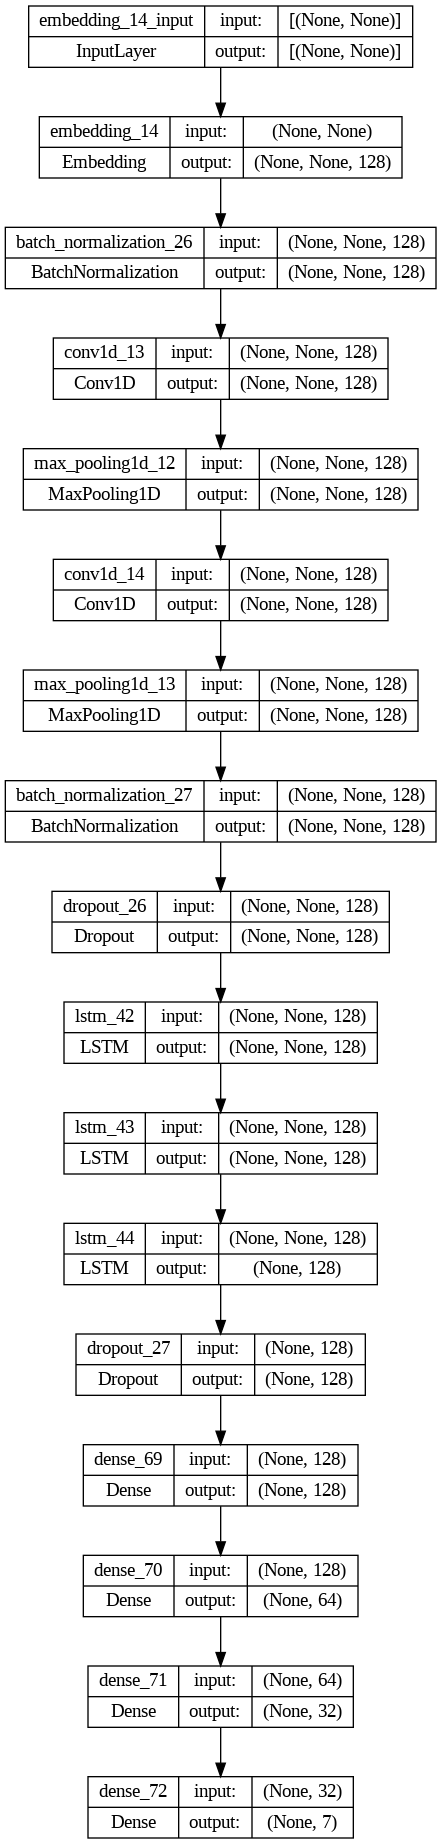

In [97]:
utils.plot_model(model, to_file='CNN_LSTM_model_architecture.png', show_shapes=True)

In [ ]:
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [84]:
model.fit(X_train, y_train, epochs=20, batch_size=64)

Epoch 1/20
31/31 [==============================] - 35s 733ms/step - loss: 1.7689 - accuracy: 0.2688
Epoch 2/20
31/31 [==============================] - 19s 612ms/step - loss: 1.5168 - accuracy: 0.3699
Epoch 3/20
31/31 [==============================] - 19s 619ms/step - loss: 1.1494 - accuracy: 0.4841
Epoch 4/20
31/31 [==============================] - 20s 630ms/step - loss: 0.9276 - accuracy: 0.5998
Epoch 5/20
31/31 [==============================] - 20s 632ms/step - loss: 0.6189 - accuracy: 0.7519
Epoch 6/20
31/31 [==============================] - 20s 638ms/step - loss: 0.3776 - accuracy: 0.8615
Epoch 7/20
31/31 [==============================] - 20s 647ms/step - loss: 0.1668 - accuracy: 0.9480
Epoch 8/20
31/31 [==============================] - 20s 655ms/step - loss: 0.0896 - accuracy: 0.9763
Epoch 9/20
31/31 [==============================] - 20s 646ms/step - loss: 0.0619 - accuracy: 0.9793
Epoch 10/20
31/31 [==============================] - 20s 646ms/step - loss: 0.0634 - accura

## Dump model into files

In [85]:
%cd /content/drive/My Drive/Text_Generator/model

/content/drive/My Drive/Text_Generator/model


In [86]:
import pickle
model.save('./model/CNN_LSTM_text_classify_model.h5')

with open('./model/CNN_LSTM_text_classify_tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Predict samples and Evaluate on test dataset

In [87]:
import pickle
model = models.load_model('./model/CNN_LSTM_text_classify_model.h5')

with open('./model/CNN_LSTM_text_classify_tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

* Predict a sample

In [89]:
sample_text = '''
Phan Đăng Hoàng, 23 tuổi, là nhà thiết kế Việt duy nhất Forbes vinh danh "Nghệ sĩ dưới 30 tuổi có tầm ảnh hưởng ở châu Á".

Trong phần giới thiệu gương mặt thuộc hạng mục The Arts, công bố ngày 16/5, Forbes viết: "Phan Đăng Hoàng là nhà thiết kế thời trang người Việt, tốt nghiệp La Nuova accademia di belle arti tại Milan. Trở về Việt Nam, anh ra mắt thương hiệu riêng, từng giới thiệu bộ sưu tập tại Tuần lễ thời trang Milan".

Phan Đăng Hoàng nói hạnh phúc trước sự ghi nhận. Anh được thông báo vào đề cử hạng mục hồi tháng 3, sau đó tiến hành làm hồ sơ gửi đi để ban tổ chức xét duyệt. "Hai tháng qua, tôi hồi hộp chờ đợi và vỡ òa vì thực sự đây là giấc mơ. Đây là động lực lớn với tôi trong chặng đường làm nghề sắp tới".
'''

In [90]:
tokeninzed_sequences = normalizer.normalize(sample_text)
temp  = normalizer.create_input(tokeninzed_sequences)
print(temp)

prediction = model.predict(temp)
print(prediction)

[[  0   0   0 ... 342   1   1]]
1/1 [==============================] - 1s 1s/step
[[8.7220967e-01 7.4875176e-02 4.8566315e-02 1.5812655e-05 4.1194605e-03
  2.1362014e-04 1.3107599e-09]]


In [91]:
result = label_encoder.inverse_transform([np.argmax(prediction[0])])
result

array(['doi-song'], dtype=object)

* Evaluate performance

In [92]:
sequences_test = normalizer.create_sequences(news_test)
X_test = normalizer.create_input(sequences_test)

print(len(X_test))
print(X_test[0:2])

100%|██████████| 495/495 [00:02<00:00, 188.77it/s]


[238, 1583, 3131, 164, 238, 16210, 653, 21390, 852, 1054, 238, 21391, 4197, 17, 600, 14, 6366, 32, 2399, 2544, 1294, 1278, 238, 3330, 8990, 21392, 3131, 1893, 2296, 97, 3805, 3877, 1087, 4197, 238, 32, 2399, 9844, 33855, 5, 1535, 356, 2158, 8113, 238, 58, 272, 706, 4699, 238, 934, 349, 178, 1072, 658, 2398, 1447, 180, 653, 21390, 1551, 6049, 256, 4731, 1267, 238, 9844, 184, 2077, 11550, 1294, 1278, 776, 164, 238, 9844, 16210, 21393, 1918, 238, 4731, 261, 160, 4731, 626, 1590, 238, 4451, 4197, 3802, 3403, 42, 33856, 946, 33857, 1275, 33858, 2004, 2821, 2544, 80, 1294, 1278, 661, 390, 238, 5, 1535, 32, 498, 2399, 6366, 67, 1565, 115, 3877, 944, 238, 9844, 2, 238, 2674, 995, 238, 33859, 112, 238, 2674, 33860, 137, 112, 3131, 164, 238, 16210, 813, 5919, 689, 152, 238, 557, 164, 238, 1095, 1528, 1294, 1278, 418, 394, 8113, 1514, 67, 8781, 952, 1893, 16188, 9844, 17, 4197, 201, 502, 1275, 8113, 3330, 711, 535, 18, 68, 9391, 238, 21391, 4197, 3735, 1246, 502]
<class 'list'>
495
[[   0    0   

In [93]:
prediction = model.predict(X_test)
print(prediction)

16/16 [==============================] - 4s 184ms/step
[[1.2540596e-04 5.0659503e-07 1.4123154e-05 ... 9.9949753e-01
  1.8143249e-04 6.9218693e-11]
 [2.7343884e-05 3.6300617e-06 2.1712005e-06 ... 2.1062831e-04
  1.7609842e-05 4.5198414e-07]
 [9.9036533e-01 8.4561985e-03 4.4567772e-04 ... 2.6092870e-04
  7.4935806e-06 2.1999632e-08]
 ...
 [1.2877359e-04 2.2134228e-04 9.9964988e-01 ... 2.9050489e-09
  1.4142961e-09 1.4686924e-17]
 [8.0156417e-07 1.7114688e-08 1.9302909e-07 ... 7.5630262e-05
  9.9992037e-01 8.4528565e-12]
 [2.4820116e-05 2.7555845e-06 1.9295069e-06 ... 2.2592540e-04
  1.6205759e-05 3.1728851e-07]]


In [94]:
predictions = [np.argmax(pred) for pred in prediction]
print(mean_squared_error(label_test, predictions))

0.4222222222222222
0.8409837779014254


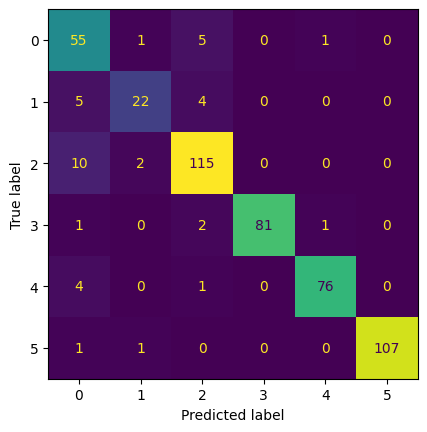

In [95]:
cm = confusion_matrix(label_test, predictions)
cfm = ConfusionMatrixDisplay(confusion_matrix=cm)
cfm.plot(colorbar=False)

In [96]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.89      0.80        62
           1       0.85      0.71      0.77        31
           2       0.91      0.91      0.91       127
           3       1.00      0.95      0.98        85
           4       0.97      0.94      0.96        81
           5       1.00      0.98      0.99       109

    accuracy                           0.92       495
   macro avg       0.91      0.90      0.90       495
weighted avg       0.93      0.92      0.92       495

